In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.enable_eager_execution()

In [3]:
UNITS = 3
BATCH_SIZE = 64
EPOCHS = 1

In [4]:
class Preprocessed:
    def __init__(self, orig):
        f = list(orig.iloc[:, 0])
        t = list(orig.iloc[:, 1])
        fd = {'s': [0, 0, 1, 0], 'e': [0, 0, 0, 1], '0': [1, 0, 0, 0], '1': [0, 1, 0, 0]}
        td = {'0': 0, '1': 1}
        ff = [list(map(lambda x: fd[x], s)) for s in f]
        tt = [list(map(lambda x: td[x], s)) for s in t]
        self.features = np.array(ff, dtype=np.float)
        self.targets = np.array(tt, dtype=np.float)

In [5]:
pdtrain = pd.read_csv('../datasets/cfl_csl/train', header=None)
prep = Preprocessed(pdtrain)

In [6]:
pdtest0 = pd.read_csv('../datasets/cfl_csl/test_0', header=None)
prep0 = Preprocessed(pdtest0)

In [7]:
class AnBn(keras.Model):
    def __init__(self):
        super().__init__()
        self.lstm = keras.layers.LSTM(UNITS,
                                    recurrent_activation='sigmoid',
                                    recurrent_initializer='glorot_uniform',
                                    return_state=True,
                                    return_sequences=True,
                                    stateful=True,)
        self.fc = keras.layers.Dense(2)
    def call(self, onehotinputs):
        h, *s = self.lstm(onehotinputs)
        y = self.fc(h)
        return y

In [8]:
model = AnBn()

In [9]:
optimizer = tf.train.AdamOptimizer()
model.compile(optimizer=optimizer,
              loss=tf.losses.softmax_cross_entropy,
              metrics=['accuracy'],

             )

In [10]:
his = model.fit(prep.features[:BATCH_SIZE], keras.utils.to_categorical(prep.targets, num_classes=2)[:BATCH_SIZE], epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/1
1/1 [==============================] - 0s 158ms/step - loss: 0.6704 - acc: 0.6880


In [11]:
while his.history['acc'][0] < 0.9999:
    his = model.fit(prep.features, keras.utils.to_categorical(prep.targets, num_classes=2), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/1
125/125 [==============================] - 18s 143ms/step - loss: 0.6000 - acc: 0.7134
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.5069 - acc: 0.7136
Epoch 1/1
125/125 [==============================] - 18s 143ms/step - loss: 0.4592 - acc: 0.7203
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.4107 - acc: 0.7895
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.3592 - acc: 0.8580
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.3357 - acc: 0.8684
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.3144 - acc: 0.8770
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.3010 - acc: 0.8833
Epoch 1/1
125/125 [==============================] - 18s 143ms/step - loss: 0.2838 - acc: 0.8912
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.2703 - acc: 0.8971
Epoch 1/1
125/125 [===========

125/125 [==============================] - 18s 142ms/step - loss: 0.0160 - acc: 0.9915
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0157 - acc: 0.9924
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0155 - acc: 0.9928
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0151 - acc: 0.9936
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0148 - acc: 0.9941
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0144 - acc: 0.9948
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0141 - acc: 0.9954
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0137 - acc: 0.9960
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0135 - acc: 0.9962
Epoch 1/1
125/125 [==============================] - 18s 142ms/step - loss: 0.0132 - acc: 0.9966
Epoch 1/1
125/125 [=====================

In [12]:
his.history['acc'][0]

0.9999375

In [13]:
model.save_weights('./saved/weights_9999')
rmodel = AnBn()
rmodel.load_weights('./saved/weights_9999')
rmodel.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.losses.softmax_cross_entropy,#'categorical_crossentropy',
              metrics=['accuracy'],
             )

In [25]:
pdtest0 = pd.read_csv('../datasets/cfl_csl/test_abab', header=None)
prep0 = Preprocessed(pdtest0)
BATCH_SIZE = 1
TIME_STEPS = 32
rmodel.build((BATCH_SIZE, TIME_STEPS, 4))

In [26]:
#rmodel.evaluate(prep0.features[:BATCH_SIZE], keras.utils.to_categorical(prep0.targets[:BATCH_SIZE], num_classes=2), batch_size=BATCH_SIZE)
rmodel.evaluate(prep0.features, keras.utils.to_categorical(prep0.targets, num_classes=2), batch_size=BATCH_SIZE)

1/1 [==============================] - 0s 72ms/step


[0.0020339875482022762, 1.0]

In [27]:
model.save_weights('./saved/weights_9999')
rmodel = AnBn()
rmodel.load_weights('./saved/weights_9999')
rmodel.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.losses.softmax_cross_entropy,#'categorical_crossentropy',
              metrics=['accuracy'],
             )
pdtest0 = pd.read_csv('../datasets/cfl_csl/test_abab', header=None)
prep0 = Preprocessed(pdtest0)
BATCH_SIZE = 1
TIME_STEPS = 1
rmodel.build((BATCH_SIZE, TIME_STEPS, 4))



In [31]:
C = []
H = []
si = 0
f = prep0.features[si]
t = prep0.targets[si]
for i in f:
    rmodel.predict(np.array([[i]]))
    lstm = rmodel.get_layer(index=0)
    H.append(lstm.states[0].numpy()[0])
    C.append(lstm.states[1].numpy()[0])
    

In [32]:
Ca = np.array(C)
Ha = np.array(H)
s = pdtest0.iloc[si, 0]

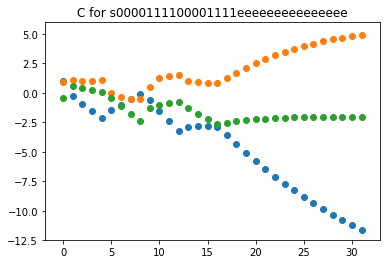

In [34]:
#plt.xlabel(list(pdtest0.iloc[0, 0]))
#plt.xlabel(list(map(lambda x: str(x[0]) + ':' + x[1], enumerate(list(pdtest0.iloc[0, 0])))))
plt.title('C for ' + s)
for i in range(3):
    plt.scatter(list(range(32)), Ca[:, i])


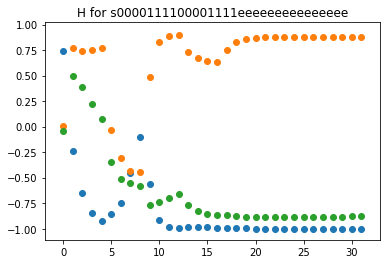

In [35]:
plt.title('H for ' + s)
for i in range(3):
    plt.scatter(list(range(32)), Ha[:, i])

In [159]:
pdtest0.iloc[0, 0]

's0000000011111111eeeeeeeeeeeeeee'